In [1]:
# importing the required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv("Dataset/customer_churn_data.csv")
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [3]:
df.shape

(1000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [5]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [6]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [7]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [8]:
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

In [9]:
df['InternetService'] = df['InternetService'].fillna('')

In [10]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [11]:
df['Churn'].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [12]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [13]:
numerical_col = df.select_dtypes(include='number')

In [14]:
numerical_col.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [15]:
# EDA
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


Text(0.5, 1.0, 'Churn (Yes/No)')

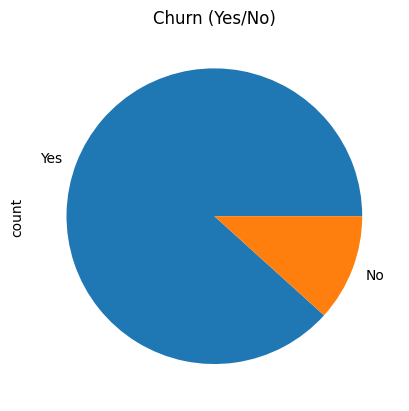

In [16]:
df['Churn'].value_counts().plot(kind='pie')
plt.title("Churn (Yes/No)")

In [17]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [18]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [19]:
df.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [20]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [21]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


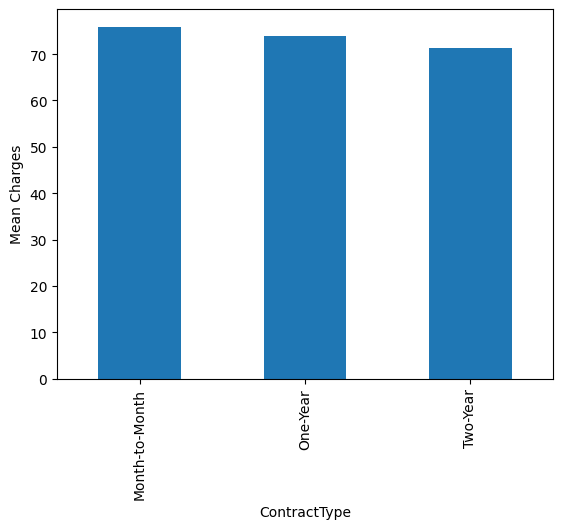

In [22]:
df.groupby('ContractType')["MonthlyCharges"].mean().plot(kind='bar')
plt.xlabel("ContractType")
plt.ylabel("Mean Charges")
plt.show()

In [23]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

Text(0.5, 1.0, 'Histogram of MonthlyCharges')

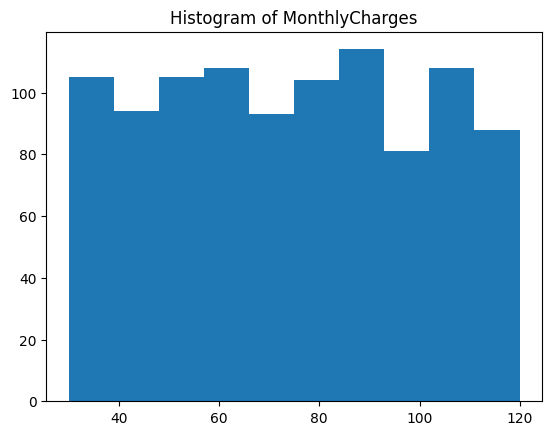

In [24]:
plt.hist(df['MonthlyCharges'],bins=10)
plt.title("Histogram of MonthlyCharges")

Text(0.5, 1.0, 'Histogram of Tenure')

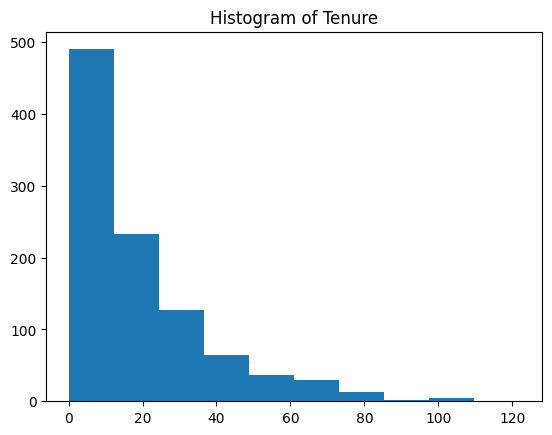

In [25]:
plt.hist(df['Tenure'])
plt.title("Histogram of Tenure")

In [26]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [27]:
# Model building
X = df.drop(['CustomerID','Churn','ContractType','InternetService','TotalCharges','TechSupport'],axis=1)
y = df["Churn"]

In [28]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01


In [29]:
y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [30]:
# feature Engineering
# 1 -> male
# 0 -> female
X['Gender'] = X['Gender'].apply(lambda x : 1 if x=='Male' else 0)

In [31]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,1,4,88.35
1,43,1,0,36.67
2,51,0,2,63.79
3,60,0,8,102.34
4,42,1,32,69.01


In [32]:
y = pd.DataFrame(y)
y.head()

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [33]:
y['Churn'] = y['Churn'].apply(lambda x : 1 if x=='Yes' else 0)
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


In [34]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [35]:
X_train.shape

(750, 4)

In [36]:
X_train.head()

,Age,Gender,Tenure,MonthlyCharges
82,59,1,11,37.95
991,24,1,32,81.93
789,28,0,22,35.39
894,58,1,7,97.81
398,43,1,66,61.06


In [37]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
import pickle
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [38]:
X_train

array([[ 1.44337668,  1.06618579, -0.4089319 , -1.42723565],
       [-2.13947324,  1.06618579,  0.71040724,  0.30704783],
       [-1.73000467, -0.93792284,  0.1773886 , -1.5281853 ],
       ...,
       [ 0.214971  ,  1.06618579,  1.93635011,  0.17691742],
       [ 0.01023671, -0.93792284, -0.35563004,  1.69510555],
       [-0.39923185, -0.93792284,  0.07078488, -0.85702785]])

In [39]:
# From EDA we have observed that the target feature as Imbalance data,so we are increasing the majority samples
# using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.metrics import accuracy_score,classification_report,r2_score
def model_performance(y_test,y_pred):
    print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
    print(f"Classification Report : ")
    print(classification_report(y_test,y_pred))
    

In [57]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_pred = logistic.predict(X_test)
model_performance(y_test,y_pred)

Accuracy Score : 0.732
Classification Report : 
              precision    recall  f1-score   support

           0       0.31      0.82      0.45        33
           1       0.96      0.72      0.82       217

    accuracy                           0.73       250
   macro avg       0.63      0.77      0.63       250
weighted avg       0.88      0.73      0.77       250



In [59]:
prams = {
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance']
}
grid_knc = GridSearchCV(KNeighborsClassifier(),param_grid=prams,cv=5)
grid_knc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [60]:
grid_knc.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [61]:
y_pred = grid_knc.predict(X_test)
model_performance(y_test,y_pred)

Accuracy Score : 0.776
Classification Report : 
              precision    recall  f1-score   support

           0       0.27      0.39      0.32        33
           1       0.90      0.83      0.87       217

    accuracy                           0.78       250
   macro avg       0.58      0.61      0.59       250
weighted avg       0.82      0.78      0.79       250



In [62]:
params = {
    'C':[0.1,1,10],
    'kernel':['linear','rbf'],
    'gamma':['scale','auto']
}
grid_svc = GridSearchCV(SVC(),params,cv=5)
grid_svc.fit(X_train,y_train)
y_pred = grid_svc.predict(X_test)
model_performance(y_test,y_pred)

Accuracy Score : 0.772
Classification Report : 
              precision    recall  f1-score   support

           0       0.31      0.58      0.40        33
           1       0.93      0.80      0.86       217

    accuracy                           0.77       250
   macro avg       0.62      0.69      0.63       250
weighted avg       0.84      0.77      0.80       250



In [63]:
params = {
    'n_estimators':[100,200],
    'max_depth' : [None,5,10],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]
}
grid_rf = GridSearchCV(RandomForestClassifier(),params,cv=5)
grid_rf.fit(X_train,y_train)
y_pred = grid_rf.predict(X_test)
model_performance(y_test,y_pred)

Accuracy Score : 0.788
Classification Report : 
              precision    recall  f1-score   support

           0       0.30      0.45      0.36        33
           1       0.91      0.84      0.87       217

    accuracy                           0.79       250
   macro avg       0.60      0.65      0.62       250
weighted avg       0.83      0.79      0.81       250



In [64]:
params = {
    'n_estimators':[100,200],
    'learning_rate' : [0.01,0.1],
    'max_depth' : [3,5,7],
    'subsample' : [0.8,1]
}
grid_xg = GridSearchCV(XGBClassifier(),params,cv=5)
grid_xg.fit(X_train,y_train)
y_pred = grid_xg.predict(X_test)
model_performance(y_test,y_pred)

Accuracy Score : 0.796
Classification Report : 
              precision    recall  f1-score   support

           0       0.30      0.39      0.34        33
           1       0.90      0.86      0.88       217

    accuracy                           0.80       250
   macro avg       0.60      0.63      0.61       250
weighted avg       0.82      0.80      0.81       250



## XGBoost and RandomForest as the same accuracy
## But the XGBoost as the higher recall and f1 score

In [65]:
# Converting model into pickle file
with open('model.pkl','wb') as file:
    pickle.dump(grid_xg,file)